In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification
License(s): CC0-1.0
100% 473M/474M [00:27<00:00, 24.1MB/s]
100% 474M/474M [00:27<00:00, 17.8MB/s]


In [2]:
import zipfile
zip_ref= zipfile.ZipFile('/content/muffin-vs-chihuahua-image-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
train_path= "/content/train"
test_path= "/content/test"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)

test_datagen= ImageDataGenerator(
    rescale= 1./255
)

In [6]:
train_set= train_datagen.flow_from_directory(
    train_path,
    target_size= (150,150),
    class_mode= 'binary',
    batch_size= 32
)

test_set= test_datagen.flow_from_directory(
    test_path,
    target_size= (150,150),
    class_mode= "binary",
    batch_size= 32
)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [7]:
model_cnn= tf.keras.models.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3 , padding='same', activation='relu',input_shape=[150,150,3]))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding= 'same'))
model_cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3 , padding='same' , activation='relu'))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding= 'same'))
model_cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3 , padding='same' , activation='relu'))
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding= 'same'))
#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3 , padding='same' , activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding= 'same'))

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(units= 128, activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.1))

model_cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model_cnn.compile(optimizer= "adam", loss="binary_crossentropy", metrics=["accuracy"])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 150, 150, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 128)       512       
 chNormalization)                                                
                                                        

In [8]:
history_cnn= model_cnn.fit(train_set, validation_data= test_set, epochs=10)

Epoch 1/10
148/148 [==============================] - 65s 373ms/step - loss: 1.5887 - accuracy: 0.7403 - val_loss: 3.0571 - val_accuracy: 0.5405
Epoch 2/10
148/148 [==============================] - 54s 362ms/step - loss: 0.4097 - accuracy: 0.8394 - val_loss: 7.5444 - val_accuracy: 0.5405
Epoch 3/10
148/148 [==============================] - 54s 362ms/step - loss: 0.3358 - accuracy: 0.8629 - val_loss: 1.4413 - val_accuracy: 0.6444
Epoch 4/10
148/148 [==============================] - 54s 364ms/step - loss: 0.2949 - accuracy: 0.8806 - val_loss: 14.2511 - val_accuracy: 0.5405
Epoch 5/10
148/148 [==============================] - 58s 390ms/step - loss: 0.2660 - accuracy: 0.8965 - val_loss: 0.2639 - val_accuracy: 0.8944
Epoch 6/10
148/148 [==============================] - 53s 361ms/step - loss: 0.2658 - accuracy: 0.9022 - val_loss: 0.6939 - val_accuracy: 0.6833
Epoch 7/10
148/148 [==============================] - 53s 360ms/step - loss: 0.2769 - accuracy: 0.8891 - val_loss: 3.5240 - val_a

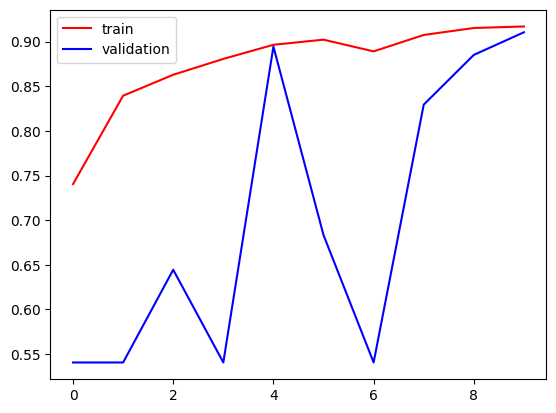

In [9]:
plt.plot(history_cnn.history['accuracy'], color='red' ,label= 'train')
plt.plot(history_cnn.history['val_accuracy'], color ='blue', label ='validation')
plt.legend()
plt.show()

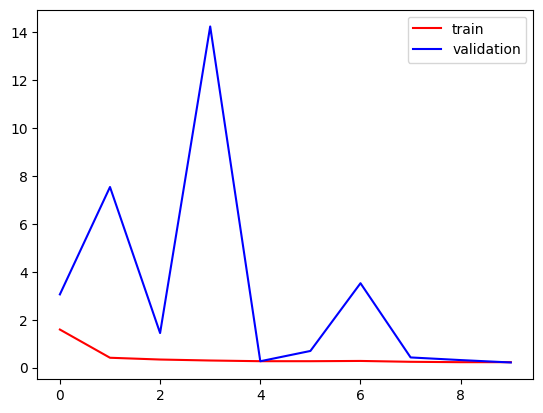

In [10]:
plt.plot(history_cnn.history['loss'], color='red' ,label= 'train')
plt.plot(history_cnn.history['val_loss'], color ='blue', label ='validation')
plt.legend()
plt.show()

In [11]:
conv_vgg= tf.keras.applications.VGG16(
    include_top= False,
    weights="imagenet",
    input_shape= (150,150,3)
)

conv_vgg.summary()


58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [12]:
for layer in conv_vgg.layers:
    layer.trainable= False

In [13]:
model_vgg= tf.keras.models.Sequential()

model_vgg.add(conv_vgg)
model_vgg.add(tf.keras.layers.Flatten())
model_vgg.add(tf.keras.layers.Dense(256, activation= 'relu'))
model_vgg.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model_vgg.compile(optimizer='adam', loss= "binary_crossentropy", metrics=["accuracy"])
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [15]:
history_vgg= model_vgg.fit(train_set, validation_data=test_set, epochs=3)

Epoch 1/3
148/148 [==============================] - 63s 387ms/step - loss: 0.2386 - accuracy: 0.9081 - val_loss: 0.0926 - val_accuracy: 0.9552
Epoch 2/3
148/148 [==============================] - 54s 364ms/step - loss: 0.0943 - accuracy: 0.9632 - val_loss: 0.0779 - val_accuracy: 0.9654
Epoch 3/3
148/148 [==============================] - 53s 357ms/step - loss: 0.0727 - accuracy: 0.9700 - val_loss: 0.0921 - val_accuracy: 0.9603


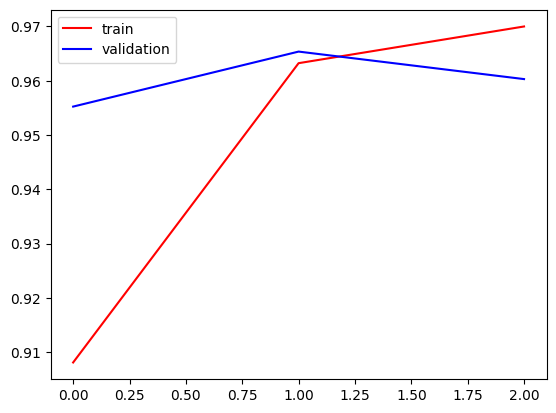

In [16]:
plt.plot(history_vgg.history['accuracy'], color='red' ,label= 'train')
plt.plot(history_vgg.history['val_accuracy'], color ='blue', label ='validation')
plt.legend()
plt.show()

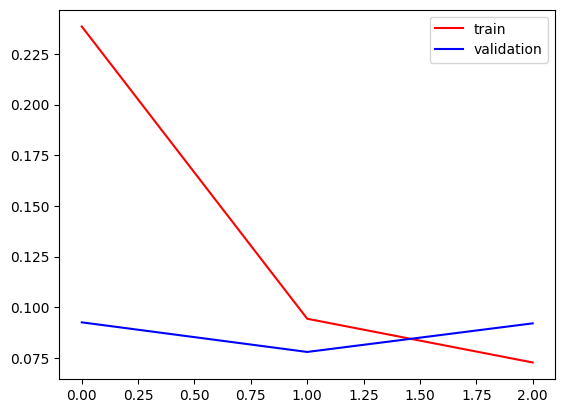

In [17]:
plt.plot(history_vgg.history['loss'], color='red' ,label= 'train')
plt.plot(history_vgg.history['val_loss'], color ='blue', label ='validation')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.applications import ResNet50

conv_resnet= ResNet50(
    include_top= False,
    weights="imagenet",
    input_shape= (150,150,3)
)
for layer in conv_resnet.layers:
    layer.trainable= False


model_resnet= tf.keras.models.Sequential()
model_resnet.add(conv_resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(512, activation= "relu"))
model_resnet.add(tf.keras.layers.Dense(1, activation= "sigmoid"))
model_resnet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_resnet.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               26214912  
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 49803137 (189.98 MB)
Trainable params: 26215425 (100.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [19]:
history_resnet= model_resnet.fit(train_set, validation_data= test_set, epochs=5)

Epoch 1/5
148/148 [==============================] - 61s 372ms/step - loss: 0.7719 - accuracy: 0.6854 - val_loss: 0.4798 - val_accuracy: 0.7787
Epoch 2/5
148/148 [==============================] - 53s 358ms/step - loss: 0.4636 - accuracy: 0.7813 - val_loss: 0.4176 - val_accuracy: 0.8117
Epoch 3/5
148/148 [==============================] - 59s 395ms/step - loss: 0.4422 - accuracy: 0.7961 - val_loss: 0.4014 - val_accuracy: 0.8193
Epoch 4/5
148/148 [==============================] - 53s 355ms/step - loss: 0.4230 - accuracy: 0.8117 - val_loss: 0.3833 - val_accuracy: 0.8302
Epoch 5/5
148/148 [==============================] - 53s 356ms/step - loss: 0.4435 - accuracy: 0.7917 - val_loss: 0.3864 - val_accuracy: 0.8336


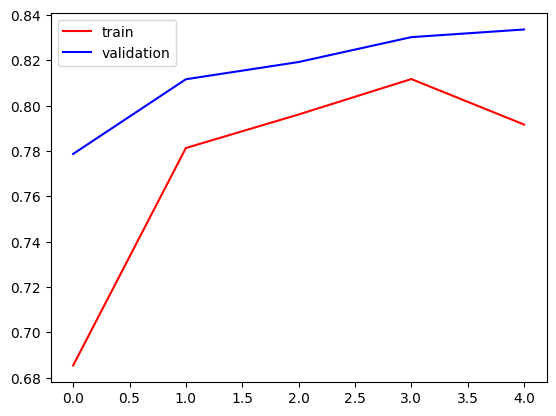

In [20]:
plt.plot(history_resnet.history['accuracy'], color='red' ,label= 'train')
plt.plot(history_resnet.history['val_accuracy'], color ='blue', label ='validation')
plt.legend()
plt.show()

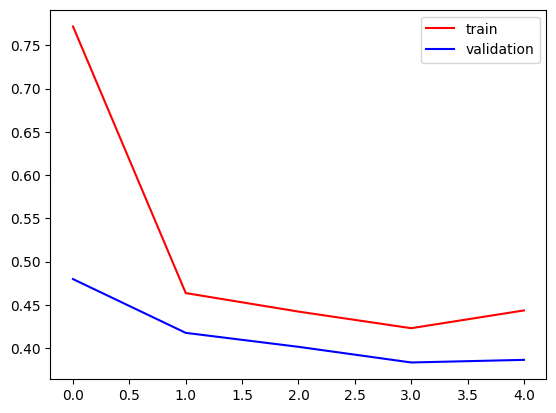

In [21]:
plt.plot(history_resnet.history['loss'], color='red' ,label= 'train')
plt.plot(history_resnet.history['val_loss'], color ='blue', label ='validation')
plt.legend()
plt.show()

In [33]:
from PIL import Image
import cv2 as cv
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image

def evaluate_model(model, image_path, image_height, image_width):

    img= image.load_img(image_path, target_size= (image_height, image_width))
    #image= cv2_resize(image, (image_height, image_width))
    img=image.img_to_array(img)
    img= np.expand_dims(img, axis=0)
    print(f"The shape of the image is: {img.shape}")

    classes= train_set.class_indices
    print(f"The class of the images in the data set is: {classes}")
    res = dict((v,k) for k,v in classes.items())

    pred_model= model.predict(img)

    model_result= pred_model[0][0] >0.5
    image_result= res[model_result]

    print(f"This image is {image_result}")

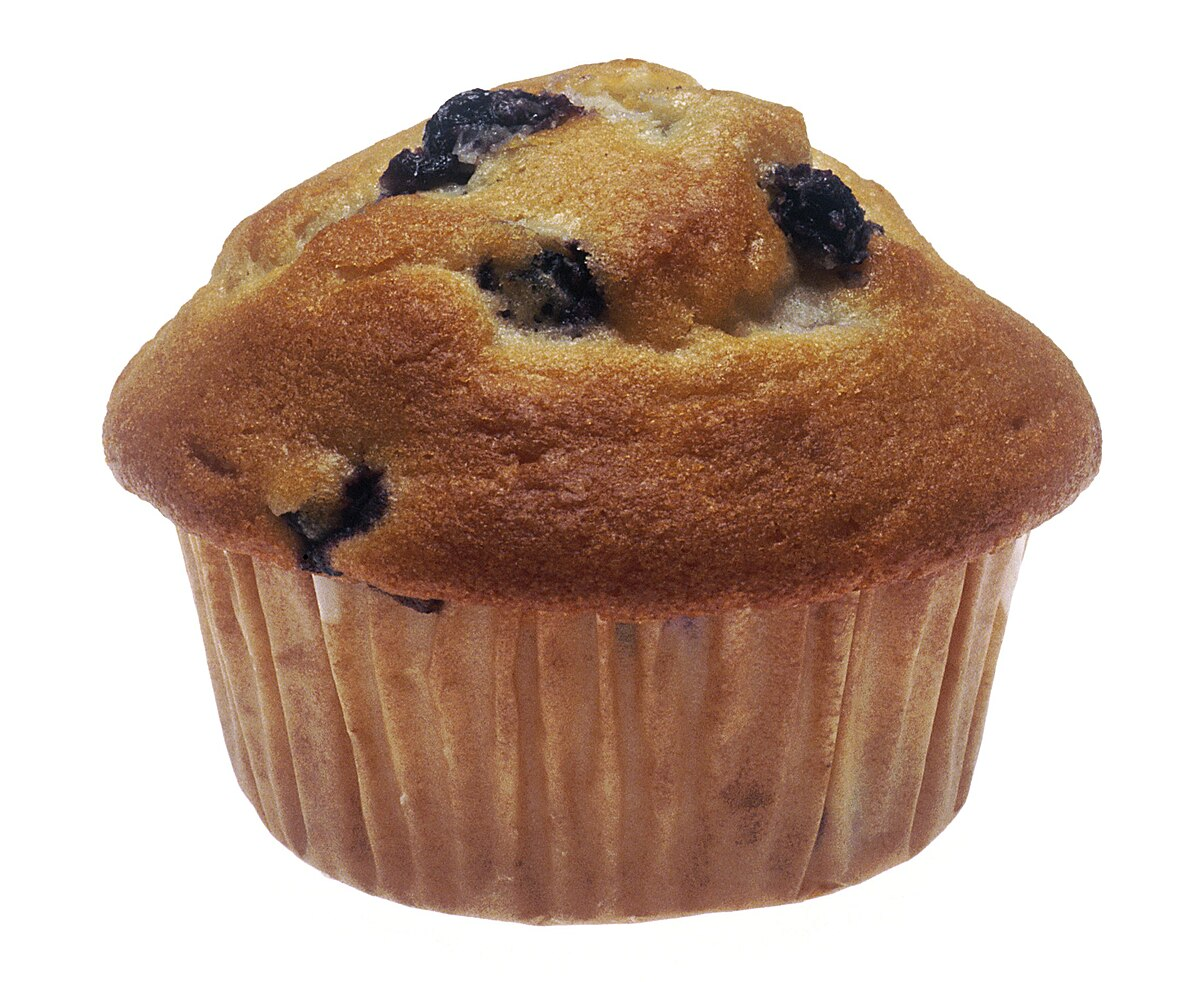

In [24]:
test_img_path1= "/content/chihuahua-dog-breed-info.jpeg"
test_img_path2= "/content/Muffin_NIH.jpg"

image= cv.imread(test_img_path2)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [25]:
import joblib
'''
joblib.dump(model_cnn, "cnn_model")
joblib.dump(model_vgg, "vgg_model")
joblib.dump(model_resnet, "resnet_model")
'''


['resnet_model']

In [26]:
cnn_model= joblib.load("/content/cnn_model")
vgg_model= joblib.load("/content/vgg_model")
resnet_model= joblib.load("/content/resnet_model")

In [27]:
image_height= 150
image_width= 150

In [36]:
evaluate_model(cnn_model,test_img_path2 , image_height, image_width)

The shape of the image is: (1, 150, 150, 3)
The class of the images in the data set is: {'chihuahua': 0, 'muffin': 1}
1/1 [==============================] - 0s 17ms/step
This image is chihuahua


In [38]:
evaluate_model(vgg_model, test_img_path2, image_height, image_width)

The shape of the image is: (1, 150, 150, 3)
The class of the images in the data set is: {'chihuahua': 0, 'muffin': 1}
1/1 [==============================] - 0s 18ms/step
This image is muffin


In [37]:
evaluate_model(resnet_model, test_img_path2, image_height, image_width)

The shape of the image is: (1, 150, 150, 3)
The class of the images in the data set is: {'chihuahua': 0, 'muffin': 1}
1/1 [==============================] - 0s 27ms/step
This image is chihuahua
